# Import with Pandas DataReader

In [1]:
from pandas_datareader import data

In [2]:
# need to paginate to get more data
data.DataReader('AAPL','yahoo',start='1995/01/01',end='2020/01/01')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,0.347098,0.338170,0.347098,0.342634,1.038688e+08,0.290871
1995-01-04,0.353795,0.344866,0.344866,0.351563,1.586816e+08,0.298451
1995-01-05,0.351563,0.345982,0.350446,0.347098,7.364000e+07,0.294660
1995-01-06,0.385045,0.367188,0.371652,0.375000,1.076622e+09,0.318347
1995-01-09,0.373884,0.366071,0.371652,0.367885,2.740864e+08,0.312307
...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,4.847880e+07,70.129509
2019-12-26,72.495003,71.175003,71.205002,72.477501,9.312120e+07,71.520912
2019-12-27,73.492500,72.029999,72.779999,72.449997,1.462660e+08,71.493759


In [3]:
df = data.DataReader(['AAPL','TSLA'],'yahoo',start='2012/01/01',end='2018/01/01')
df.head()

Attributes  Adj Close             Close              High               Low  \
Symbols          AAPL   TSLA       AAPL   TSLA       AAPL   TSLA       AAPL   
Date                                                                          
2012-01-03  12.610314  5.616  14.686786  5.616  14.732143  5.900  14.607143   
2012-01-04  12.678085  5.542  14.765714  5.542  14.810000  5.734  14.617143   
2012-01-05  12.818837  5.424  14.929643  5.424  14.948214  5.586  14.738214   
2012-01-06  12.952841  5.382  15.085714  5.382  15.098214  5.558  14.972143   
2012-01-09  12.932299  5.450  15.061786  5.450  15.276786  5.498  15.048214   

Attributes              Open              Volume             
Symbols      TSLA       AAPL   TSLA         AAPL       TSLA  
Date                                                         
2012-01-03  5.530  14.621429  5.788  302220800.0  4640500.0  
2012-01-04  5.500  14.642857  5.642  260022000.0  3150500.0  
2012-01-05  5.370  14.819643  5.552  271269600.0  5027500.0  
2012-01-06  5.282  14.991786  5.440  318292800.0  4931500.0  
2012-01-09  5.224  15.196429  5.400  394024400.0  4485000.0

In [4]:
df.to_csv('./data/test.csv',index=False)

In [5]:
df_fed = data.DataReader('DGS1MO','fred',start='2012/01/01',end='2018/01/01')

In [6]:
df_fed.head()

,DGS1MO
DATE,
2012-01-02,NaN
2012-01-03,0.01
2012-01-04,0.01
2012-01-05,0.01
2012-01-06,0.02


# Importing with Quandl

In [7]:
#!pip install quandl

In [8]:
import quandl
quandl.ApiConfig.api_key = "VijHdQwRpsszRMhSdfeS"
import numpy as np
import pandas as pd

In [9]:
prices = quandl.get_table('SHARADAR/SEP', ticker=['AAPL', 'KO', 'NKE', 'TSLA', 'XOM'], date={'gte':'2017-01-01', 'lte':'2018-12-31'}, paginate=True)

In [10]:
prices.tail()

,ticker,date,open,high,low,close,volume,closeadj,closeunadj,lastupdated
None,,,,,,,,,,
405,AAPL,2018-09-10,55.237,55.462,54.117,54.583,158065812.0,52.876,218.33,2021-08-06
406,AAPL,2018-09-07,55.462,56.343,55.178,55.325,150479240.0,53.596,221.30,2021-08-06
407,AAPL,2018-09-06,56.557,56.837,55.325,55.775,137159904.0,54.032,223.10,2021-08-06
408,AAPL,2018-09-05,57.248,57.417,56.275,56.718,133331840.0,54.945,226.87,2021-08-06
409,AAPL,2018-09-04,57.102,57.295,56.657,57.090,109560528.0,55.305,228.36,2021-08-06


In [11]:
pivoted = prices.pivot(index='date', columns='ticker', values='close')

In [12]:
pivoted.sort_index()

ticker,AAPL,KO,NKE,TSLA,XOM
date,,,,,
2018-09-04,57.090,44.76,79.60,57.790,80.29
2018-09-05,56.718,45.38,79.92,56.148,81.36
2018-09-06,55.775,45.77,80.40,56.190,80.46
2018-09-07,55.325,45.72,80.30,52.648,81.83
2018-09-10,54.583,46.06,82.10,57.100,81.71
...,...,...,...,...,...
2018-12-24,36.708,45.96,68.10,59.078,65.51
2018-12-26,39.292,46.94,73.01,65.218,68.64
2018-12-27,39.038,47.53,73.67,63.226,68.94


In [13]:
# calculate % change
pivoted.pct_change().head()

ticker,AAPL,KO,NKE,TSLA,XOM
date,,,,,
2018-09-04,NaN,NaN,NaN,NaN,NaN
2018-09-05,-0.006516,0.013852,0.004020,-0.028413,0.013327
2018-09-06,-0.016626,0.008594,0.006006,0.000748,-0.011062
2018-09-07,-0.008068,-0.001092,-0.001244,-0.063036,0.017027
2018-09-10,-0.013412,0.007437,0.022416,0.084562,-0.001466


# Calculating Variance

$$s^{2} = \frac{\sum (x_{i} - \bar{x})^{2}}{N - 1}$$

In [14]:
aapl = pivoted['AAPL'].pct_change().apply(lambda x : np.log(1+x))
aapl.head()

date
2018-09-04         NaN
2018-09-05   -0.006537
2018-09-06   -0.016766
2018-09-07   -0.008101
2018-09-10   -0.013502
Name: AAPL, dtype: float64

In [15]:
mean_aapl = aapl.mean()

In [16]:
aapl.mean()

-0.004567595347237204

In [17]:
sqd_aapl = aapl.apply(lambda x: (x-mean_aapl)**2)

In [18]:
ssqd_aapl = sqd_aapl.sum()

In [19]:
ssqd_aapl

0.04422322669016032

In [20]:
ssqd_aapl/(aapl.count()-1)

0.000552790333627004

In [21]:
var_aapl = aapl.var()
var_aapl

0.0005527903336270039

# Standard Deviation

$$s = \sqrt{\frac{\sum (x_{i} - \bar{x})^{2}}{N - 1}}$$

In [22]:
np.sqrt(var_aapl)

0.0235114936494261

In [23]:
# daily vol
aapl.std()

0.0235114936494261

In [24]:
# annual vol (250 trading days~)
aapl.std()*np.sqrt(250)

0.3717493556238544

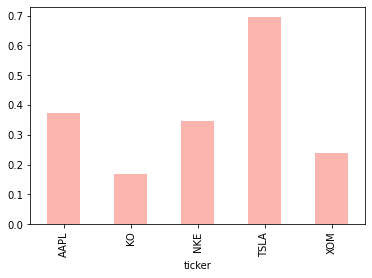

In [25]:
pivoted.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar', cmap='Pastel1');

In [26]:
aapl.var()

0.0005527903336270039

# Covariace

$$cov_{x_{i},x_{j}}=\frac{\sum_{i=1j=1}^{N}(x_{i}-\bar{x_{i}})(x_{j}-\bar{x_{j}})}{N-1}$$

In [27]:
df = pivoted.pct_change()

In [28]:
mean_aapl = df['AAPL'].mean()

In [29]:
mean_tsla = df['TSLA'].mean()

In [30]:
df['DEV_AAPL'] = df['AAPL'].apply(lambda x: x-mean_aapl)

In [31]:
df['DEV_TSLA'] = df['TSLA'].apply(lambda x: x-mean_tsla)

In [32]:
df['dot_prod'] = df['DEV_AAPL']*df['DEV_TSLA']

In [33]:
df['dot_prod'].sum()/(df.DEV_AAPL.count()-1)

0.00035960369949982195

In [34]:
df['AAPL'].cov(df['TSLA'])

0.0003596036994998219

# Correlation

$${SS}_{x_{i}x_{j}} = \frac {COV_{x_{i},x_{j}}}{\sigma_{i}\sigma_{j}}$$

In [35]:
df = pivoted.pct_change()

In [36]:
var_tsla = df['TSLA'].var()
var_tsla

0.0019831648958398

In [37]:
df['XOM'].var()

0.00022571746193817468

In [38]:
df['TSLA'].std()

0.044532739595041754

In [39]:
df['XOM'].std()

0.015023896363399698

In [40]:
df['TSLA'].cov(df['XOM'])/(df['TSLA'].std()*df['XOM'].std())

0.3209131840339626

In [41]:
df['TSLA'].corr(df['XOM'])

0.3209131840339626

---
# COMBINE THE ABOVE FORMULAS

# Portfolio Variance

$$\sigma^2(R_p) = w_1w_1\sigma^2(R_1) + w_1w_2COV(R_1,R_2) + w_2w_2\sigma^2(R_2) + w_2w_1COV(R_1,R_2)$$
$$\sigma^2(R_p) = \sum_{i=1}^n\sum_{j=1}^nw_iw_jCOV(R_i, R_j)$$

In [42]:
prices = quandl.get_table('SHARADAR/SEP', date={'gte':'2017-01-01', 'lte':'2018-12-31'}, paginate=True)
stocks = list(prices.ticker.unique())

In [43]:
#!pip install requests_cache

In [44]:
import pandas_datareader.data as web
from pandas_datareader.yahoo.headers import DEFAULT_HEADERS
import datetime
import requests_cache

expire_after = datetime.timedelta(days=3)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)
session.headers = DEFAULT_HEADERS

start = datetime.datetime(2017, 1, 1)

end = datetime.datetime(2018, 12, 31)
f = web.DataReader(stocks, 'yahoo', start, end, session=session)


In [45]:
# need to paginate to get more data
prices = data.DataReader(stocks,'yahoo',start='2017/01/01',end='2018/12/31')

In [46]:
# sort the columns alphabetically, get returns, get log difference
df = f.reindex(sorted(f.columns), axis=1)['Adj Close'].pct_change().apply(lambda x: np.log(1+x))

In [47]:
# remove NA
df.dropna(inplace=True)

In [48]:
# get Cov matrix
df.cov()

Symbols,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,TSLA,UNH,V,VZ,WMT,XOM
Symbols,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000226,0.000081,0.000104,0.000110,0.000111,0.000058,0.000098,0.000066,0.000062,0.000101,...,0.000076,0.000050,0.000027,0.000039,0.000139,0.000080,0.000119,0.000010,0.000049,0.000057
AXP,0.000081,0.000150,0.000091,0.000109,0.000089,0.000066,0.000094,0.000060,0.000071,0.000112,...,0.000070,0.000056,0.000035,0.000063,0.000097,0.000072,0.000094,0.000036,0.000047,0.000059
BA,0.000104,0.000091,0.000256,0.000155,0.000105,0.000084,0.000121,0.000065,0.000073,0.000111,...,0.000082,0.000054,0.000035,0.000065,0.000112,0.000088,0.000112,0.000036,0.000058,0.000072
CAT,0.000110,0.000109,0.000155,0.000296,0.000123,0.000111,0.000163,0.000072,0.000074,0.000134,...,0.000102,0.000061,0.000038,0.000076,0.000115,0.000084,0.000118,0.000024,0.000056,0.000097
CSCO,0.000111,0.000089,0.000105,0.000123,0.000189,0.000072,0.000103,0.000068,0.000065,0.000102,...,0.000090,0.000069,0.000036,0.000059,0.000120,0.000075,0.000113,0.000041,0.000062,0.000065
CVX,0.000058,0.000066,0.000084,0.000111,0.000072,0.000156,0.000086,0.000050,0.000068,0.000082,...,0.000056,0.000047,0.000030,0.000049,0.000076,0.000056,0.000063,0.000038,0.000040,0.000098
DD,0.000098,0.000094,0.000121,0.000163,0.000103,0.000086,0.000210,0.000071,0.000071,0.000117,...,0.000091,0.000061,0.000039,0.000062,0.000111,0.000076,0.000097,0.000035,0.000051,0.000077
DIS,0.000066,0.000060,0.000065,0.000072,0.000068,0.000050,0.000071,0.000133,0.000067,0.000069,...,0.000068,0.000050,0.000031,0.000043,0.000082,0.000053,0.000054,0.000041,0.000043,0.000054
GE,0.000062,0.000071,0.000073,0.000074,0.000065,0.000068,0.000071,0.000067,0.000394,0.000090,...,0.000049,0.000046,0.000023,0.000055,0.000096,0.000053,0.000051,0.000041,0.000035,0.000054


In [49]:
df.corr()

Symbols,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,TSLA,UNH,V,VZ,WMT,XOM
Symbols,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.438358,0.434415,0.425506,0.535621,0.306547,0.451225,0.379904,0.207276,0.463790,...,0.314434,0.325774,0.184285,0.244458,0.305979,0.439950,0.624889,0.054123,0.241438,0.345994
AXP,0.438358,1.000000,0.466358,0.516736,0.530124,0.433046,0.530347,0.423082,0.293397,0.628774,...,0.355376,0.449624,0.291097,0.482228,0.260879,0.489366,0.606204,0.247454,0.284904,0.436743
BA,0.434415,0.466358,1.000000,0.563445,0.479439,0.420814,0.520823,0.351696,0.229071,0.480498,...,0.319275,0.332798,0.222823,0.376340,0.231285,0.454808,0.551223,0.193605,0.272485,0.411304
CAT,0.425506,0.516736,0.563445,1.000000,0.519472,0.514150,0.653575,0.360866,0.217550,0.535999,...,0.365572,0.350984,0.226307,0.409955,0.220450,0.405835,0.543888,0.117306,0.243363,0.511474
CSCO,0.535621,0.530124,0.479439,0.519472,1.000000,0.422066,0.516811,0.429900,0.236964,0.512769,...,0.405170,0.498664,0.263034,0.400338,0.289147,0.449893,0.650235,0.252501,0.335856,0.432170
CVX,0.306547,0.433046,0.420814,0.514150,0.422066,1.000000,0.474843,0.347930,0.274401,0.453749,...,0.278293,0.373741,0.246717,0.368282,0.199944,0.372461,0.396711,0.260597,0.241336,0.717439
DD,0.451225,0.530347,0.520823,0.653575,0.516811,0.474843,1.000000,0.423117,0.248793,0.559004,...,0.389589,0.417948,0.271773,0.400851,0.253747,0.433062,0.529130,0.206213,0.261878,0.484808
DIS,0.379904,0.423082,0.351696,0.360866,0.429900,0.347930,0.423117,1.000000,0.291272,0.415233,...,0.365192,0.425598,0.273444,0.346367,0.234608,0.380989,0.370350,0.300670,0.276689,0.429753
GE,0.207276,0.293397,0.229071,0.217550,0.236964,0.274401,0.248793,0.291272,1.000000,0.313050,...,0.151660,0.229901,0.116441,0.257772,0.159284,0.220657,0.201146,0.175410,0.132182,0.246088


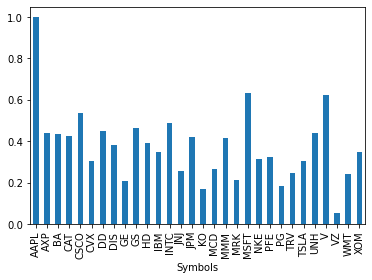

In [50]:
df.corr()['AAPL'].plot(kind='bar');

# Portfolio Variance
$$\sigma^2(R_p) = w_1w_1\sigma^2(R_1) + w_1w_2COV(R_1,R_2) + w_2w_2\sigma^2(R_2) + w_2w_1COV(R_1,R_2)$$
$$\sigma^2(R_p) = \sum_{i=1}^n\sum_{j=1}^nw_iw_jCOV(R_i, R_j)$$

# Portfolio Standard Deviation
$$\sigma(R_p) = \sqrt{\sigma^2(R_p)}$$

In [51]:
expire_after = datetime.timedelta(days=3)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)
session.headers = DEFAULT_HEADERS

start = datetime.datetime(2000, 1, 1)

end = datetime.datetime(2018, 12, 31)
f = web.DataReader(['AAPL','NKE'], 'yahoo', start, end, session=session)

In [52]:
df1= f['Adj Close'].pct_change().apply(lambda x : np.log(1+x))

In [53]:
cov_matrix = df1.cov()

In [54]:
w = {'AAPL' : .75 , 'NKE' : .25 }

In [55]:
#portfolio variance

p_var = cov_matrix.mul(w, axis=0).mul(w,axis=1).sum().sum()

In [56]:
p_var

0.0004767950063818433

In [57]:
# portfolio standard deviation

p_sd = np.sqrt(p_var)
p_sd

0.02183563615702193

In [58]:
# multiply by 250 trading days for annualised vol

ann_p_sd = p_sd*np.sqrt(250)
ann_p_sd

0.34525172207457683

# portfolio variance part II


In [59]:
sd = df1.std()
sd

Symbols
AAPL    0.026857
NKE     0.018916
dtype: float64

In [60]:
df1['AAPL'].corr(df1['NKE'])

0.2556550287369516

In [61]:
# .25 is used as an arbitrary number. 
# but this number represents correlation of e 2 stocks
p_var = w['AAPL']**2*sd['AAPL']**2+w['NKE']**2*sd['NKE']**2\
        +2*w['AAPL']*w['NKE']*.25*sd['AAPL']*sd['NKE']
p_var

0.00047571765596501653

In [62]:
ann_p_sd = (p_var*250)**.5
ann_p_sd

0.344861441728782

In [63]:
np.linspace(-1,1,10)

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [64]:
p_vol = []
for corr in np.linspace(-1,1,10):
    p_var = w['AAPL']**2*sd['AAPL']**2+w['NKE']**2*sd['NKE']**2\
        +2*w['AAPL']*w['NKE']*corr*sd['AAPL']*sd['NKE']
    ann_p_sd = np.sqrt(p_var*250)
    p_vol.append(ann_p_sd)
p_vol

[0.24370973941380672,
 0.26453437012903425,
 0.2838352142951684,
 0.30190466172022495,
 0.3189520664031239,
 0.3351334309752491,
 0.3505686986193453,
 0.36535244401273775,
 0.37956080440490686,
 0.39325615079095616]

---

# Portfolio Expected Return
$$E(R_p) = w_1E(R_1) + w_2E(R_2) + ... + w_nE(R_n)$$

In [65]:
df = f['Adj Close'].resample('Y').last().pct_change()
df.head()

Symbols,AAPL,NKE
Date,,
1999-12-31,NaN,NaN
2000-12-31,-0.710638,0.133159
2001-12-31,0.472268,0.013130
2002-12-31,-0.345661,-0.205159
2003-12-31,0.491275,0.548008


In [66]:
e_r = df.mean()
e_r

Symbols
AAPL    0.404866
NKE     0.172771
dtype: float64

In [67]:
w = [.75,.25]
(e_r*w).sum()

0.34684270459090755

In [68]:
# exp return by multiplying weights and stock exp return then sum

np.dot(w,e_r)

0.34684270459090755

---
# Efficient Frontier

In [69]:
cov_matrix

Symbols,AAPL,NKE
Symbols,,
AAPL,0.000721,0.000130
NKE,0.000130,0.000358


In [70]:
sd = sd.apply(lambda x:x*np.sqrt(250))
sd

Symbols
AAPL    0.424644
NKE     0.299093
dtype: float64

In [71]:
assets = pd.concat([e_r,sd],axis = 1)
assets.columns = ['returns','volatility']
assets

,returns,volatility
Symbols,,
AAPL,0.404866,0.424644
NKE,0.172771,0.299093


In [72]:
p_ret = []
p_weights = []
p_vol = []

num_portfolios = 1

for portfolio in range(num_portfolios):
    weights = [.25,.75]
    p_weights.append(weights)
    
    returns = np.dot(weights,e_r)
    p_ret.append(returns)
    
    var = cov_matrix.mul(weights,axis=0).mul(weights,axis=1).sum().sum()
    ann_sd = np.sqrt(var*250)
    p_vol.append(ann_sd)
    
data = {'returns': p_ret, 'volatility': p_vol}

In [73]:
portfolios = pd.DataFrame(data)
portfolios.index = ['portfolio1']
portfolios

,returns,volatility
portfolio1,0.230795,0.271599


In [74]:
op_space = pd.concat([portfolios,assets])
op_space

,returns,volatility
portfolio1,0.230795,0.271599
AAPL,0.404866,0.424644
NKE,0.172771,0.299093


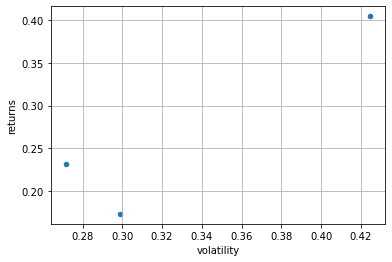

In [75]:
op_space.plot.scatter(x='volatility',y='returns',grid=True);

# Efficient Frontier II

In [76]:
expire_after = datetime.timedelta(days=3)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)
session.headers = DEFAULT_HEADERS

start = datetime.datetime(2000, 1, 1)

end = datetime.datetime(2018, 12, 31)
f = web.DataReader(['AAPL','KO','NKE'], 'yahoo', start, end, session=session)

In [77]:
cov_matrix =f['Close'].pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,KO,NKE
Symbols,,,
AAPL,0.000721,0.000064,0.000130
KO,0.000064,0.000168,0.000075
NKE,0.000130,0.000075,0.000358


In [78]:
e_r = f['Close'].resample('Y').last().pct_change().mean()
e_r

Symbols
AAPL    0.397216
KO      0.036751
NKE     0.160067
dtype: float64

In [79]:
sd = f['Close'].pct_change().apply(lambda x: np.log(1+x)).std()\
        .apply(lambda x:x*np.sqrt(250))
sd

Symbols
AAPL    0.424701
KO      0.204959
NKE     0.299150
dtype: float64

In [80]:
assets = pd.concat([e_r,sd],axis = 1)
assets.columns = ['returns','volatility']
assets

,returns,volatility
Symbols,,
AAPL,0.397216,0.424701
KO,0.036751,0.204959
NKE,0.160067,0.299150


In [81]:
p_ret = []
p_weights = []
p_vol = []

num_assets = len(f['Close'].columns)
num_portfolios = 10_000

for portfolio in range(num_portfolios):
    #weights = [.25,.75]
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    
    returns = np.dot(weights,e_r)
    p_ret.append(returns)
    
    var = cov_matrix.mul(weights,axis=0).mul(weights,axis=1).sum().sum()
    ann_sd = np.sqrt(var*250)
    p_vol.append(ann_sd)
    
data = {'returns': p_ret, 'volatility': p_vol}

In [82]:
for counter, symbol in enumerate(f['Close'].columns.tolist()):
    data[symbol + '_weight'] = [w[counter] for w in p_weights]

In [83]:
portfolios = pd.DataFrame(data)
portfolios

,returns,volatility,AAPL_weight,KO_weight,NKE_weight
0,0.225168,0.261370,0.301655,0.052194,0.646151
1,0.135134,0.192554,0.174741,0.538228,0.287031
2,0.249196,0.268760,0.400636,0.047693,0.551671
3,0.144304,0.194944,0.214329,0.539999,0.245671
4,0.198973,0.222856,0.351947,0.361333,0.286719
...,...,...,...,...,...
9995,0.233783,0.250440,0.397933,0.167483,0.434584
9996,0.307638,0.313423,0.644767,0.043260,0.311972
9997,0.259481,0.275936,0.572644,0.295077,0.132279
9998,0.170564,0.217566,0.200633,0.300713,0.498654


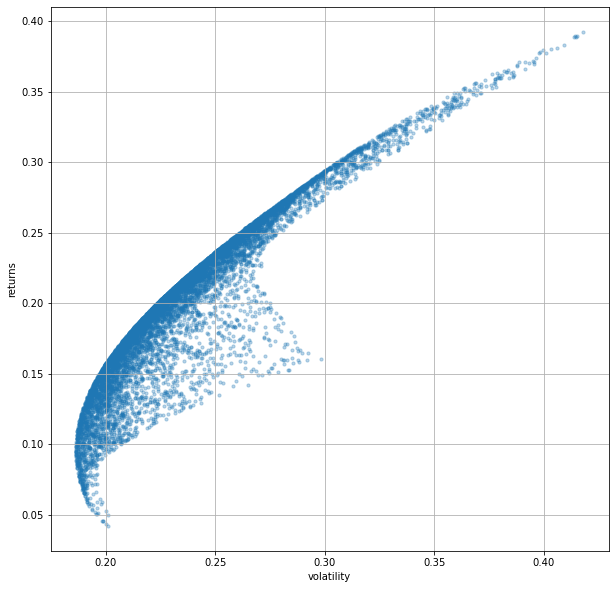

In [84]:
portfolios.plot.scatter(x='volatility',y='returns',grid=True,\
                        marker='o', s=10, alpha=0.3,figsize=[10,10]);

____
# put it all together, step-by-step

In [85]:
prices = quandl.get(['NASDAQOMX/NQDMXUS.1','NASDAQOMX/NDX.1',\
                     'NASDAQOMX/QGREEN.1'])
prices.head()

,NASDAQOMX/NQDMXUS - Index Value,NASDAQOMX/NDX - Index Value,NASDAQOMX/QGREEN - Index Value
Trade Date,,,
2001-03-30,737.93,NaN,NaN
2001-04-02,732.70,NaN,NaN
2001-04-03,722.45,NaN,NaN
2001-04-04,733.95,NaN,NaN
2001-04-05,745.27,NaN,NaN


In [86]:
cov_matrix = prices.pct_change().apply(lambda x : np.log(1+x)).cov()
cov_matrix

,NASDAQOMX/NQDMXUS - Index Value,NASDAQOMX/NDX - Index Value,NASDAQOMX/QGREEN - Index Value
NASDAQOMX/NQDMXUS - Index Value,0.000118,0.000067,0.000078
NASDAQOMX/NDX - Index Value,0.000067,0.000196,0.000109
NASDAQOMX/QGREEN - Index Value,0.000078,0.000109,0.000114


In [87]:
e_r = prices.resample('Y').last().pct_change().mean()
e_r

NASDAQOMX/NQDMXUS - Index Value    0.062246
NASDAQOMX/NDX - Index Value        0.159862
NASDAQOMX/QGREEN - Index Value     0.113006
dtype: float64

In [88]:
sd = prices.pct_change().apply(lambda x : np.log(1+x)).std()\
    .apply(lambda x : x*np.sqrt(250))
sd

NASDAQOMX/NQDMXUS - Index Value    0.171481
NASDAQOMX/NDX - Index Value        0.221611
NASDAQOMX/QGREEN - Index Value     0.169089
dtype: float64

In [89]:
assets = pd.concat([e_r,sd],axis=1)
assets.columns = ['returns','volatility']
assets

,returns,volatility
NASDAQOMX/NQDMXUS - Index Value,0.062246,0.171481
NASDAQOMX/NDX - Index Value,0.159862,0.221611
NASDAQOMX/QGREEN - Index Value,0.113006,0.169089


In [90]:
p_ret = []
p_weights = []
p_vol = []

num_assets = len(prices.columns)
num_portfolios = 10_000

for portfolio in range(num_portfolios):
    # get random weighted portfolio
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    
    # get expected returns of random portfolio
    returns = np.dot(weights,e_r)
    p_ret.append(returns)
    
    # get expected returns of random portfolio
    var = cov_matrix.mul(weights,axis=0).mul(weights,axis=1).sum().sum()
    ann_sd = np.sqrt(var*250)
    p_vol.append(ann_sd)
    
# compile data to DF
data = {'returns': p_ret, 'volatility': p_vol}
for counter, symbol in enumerate(prices.columns.tolist()):
    data[symbol + '_weight'] = [w[counter] for w in p_weights]

In [91]:
portfolios = pd.DataFrame(data)
portfolios

,returns,volatility,NASDAQOMX/NQDMXUS - Index Value_weight,NASDAQOMX/NDX - Index Value_weight,NASDAQOMX/QGREEN - Index Value_weight
0,0.117240,0.170088,0.408504,0.532902,0.058594
1,0.090953,0.156487,0.596423,0.175456,0.228121
2,0.137406,0.185598,0.110310,0.640237,0.249453
3,0.114001,0.165267,0.388876,0.442501,0.168624
4,0.130614,0.176599,0.127801,0.514234,0.357966
...,...,...,...,...,...
9995,0.101782,0.159261,0.516417,0.319898,0.163685
9996,0.120774,0.173596,0.384660,0.582485,0.032855
9997,0.099342,0.156818,0.483409,0.232070,0.284521
9998,0.146367,0.198792,0.067286,0.784869,0.147845


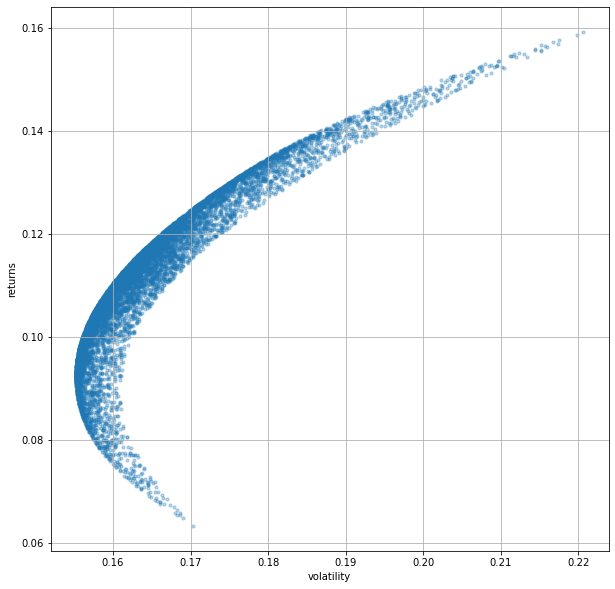

In [92]:
# plot random portfolios and expected returns
portfolios.plot.scatter(x='volatility',y='returns',grid=True,\
                        marker='o', s=10, alpha=0.3,figsize=[10,10]);

# Global Minimum Variance Portfolio

In [93]:
# portfolios with lowest volatility
min_var_port = portfolios.loc[portfolios['volatility'].idxmin()]

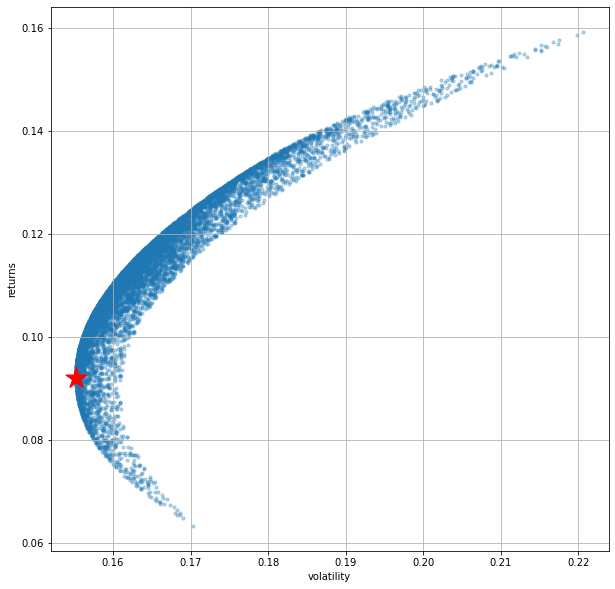

In [94]:
import matplotlib.pyplot as plt
portfolios.plot.scatter(x='volatility',y='returns',grid=True,\
                        marker='o', s=10, alpha=0.3,figsize=[10,10])
plt.scatter(x=min_var_port[1],y=min_var_port[0],\
            color='r', marker='*', s=500);

# Optimal Risky Portfolio

$$Sharpe Ratio = \frac{E(R_i)-rf}{\sigma_i}$$

Sharpe Ratio is the ratio of return to volatility. The larger the ratio, the more return per unit vol.

In [97]:
rf = .025

9940

In [106]:
# find index of highest sharpe ratio
print(((portfolios['returns']-rf)/portfolios['volatility']).idxmax())

# find details of highest sharpe ratio
sharpe_max = portfolios.loc[((portfolios['returns']-rf)/portfolios['volatility']).idxmax()]

9940


In [107]:
((portfolios['returns']-rf)/portfolios['volatility']).max()

0.6187226503820217

In [108]:
sharpe_max

returns                                   0.144709
volatility                                0.193477
NASDAQOMX/NQDMXUS - Index Value_weight    0.000824
NASDAQOMX/NDX - Index Value_weight        0.677492
NASDAQOMX/QGREEN - Index Value_weight     0.321684
Name: 9940, dtype: float64

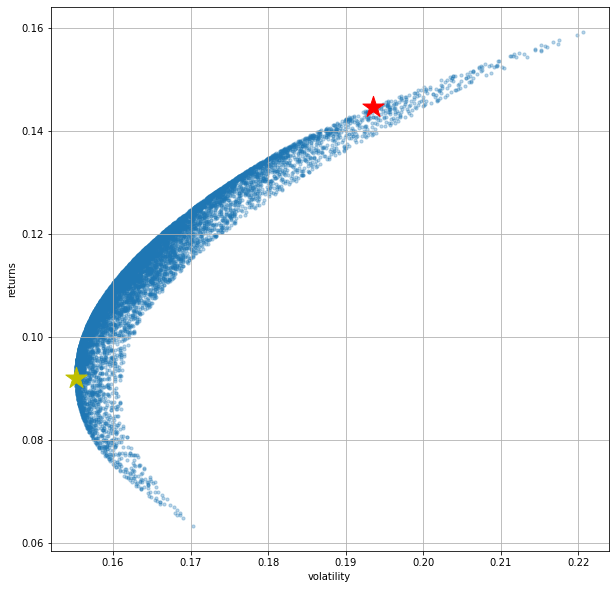

In [111]:
portfolios.plot.scatter(x='volatility',y='returns',grid=True,\
                        marker='o', s=10, alpha=0.3,figsize=[10,10])
plt.scatter(x=min_var_port[1],y=min_var_port[0],\
            color='y', marker='*', s=500);
plt.scatter(x=sharpe_max[1],y=sharpe_max[0],\
            color='r', marker='*', s=500);

# Capital Allocation Line
$$E(R_P) = rf + \frac{E(R_i)-rf}{\sigma_i}\sigma_p$$

This line implies all the possible allocations of portfolio. i.e. different combinations of the sharpe optimised portfolio and a risk-free asset (e.g. T-bill) (from risk free to most risk).  

There is a linear relationship in returns, because th portfolio only has 2 components and as the risky portfolio weight decreases the returns decrease monotonously. linear relationship in sd due to the risk-free having 0 vol so the decrease in volatility from the optimal portfolio to risk free is monotonous. 

# Utility Function
$$U = E(R)-0.5A\sigma^2$$

This function is from a economic model. Higher return leads to higher utility.  
A is the coefficient of risk aversion. If A is small then the are less risk averse. We assume 0 < A < 10. 

Expected return is the level of utility and is discounted by level of risk aversion. 

# Final optimised portfolio
To come up with the final optimised portfolio below, we find the intersection of the Capital allocation line and Utility function


## Assumptions
- investors always want to reduce risk
- investors want the greatest return for risk

In [176]:
cal_x = []
cal_y = []
utility = []
a = 3.5

In [177]:
for er in np.linspace(rf, max(p_ret), 1000):
    sd = (er - rf)/((sharpe_max[0]-rf)/sharpe_max[1])
    u = er - .5*a*(sd**2)
    cal_x.append(sd)
    cal_y.append(er)
    utility.append(u)

In [178]:
data2 = {'utility':utility, 'cal_y':cal_y, 'cal_x':cal_x}
cal = pd.DataFrame(data2)
cal.head()

,utility,cal_y,cal_x
0,0.025000,0.025000,0.000000
1,0.025134,0.025134,0.000217
2,0.025269,0.025269,0.000435
3,0.025403,0.025403,0.000652
4,0.025536,0.025538,0.000869


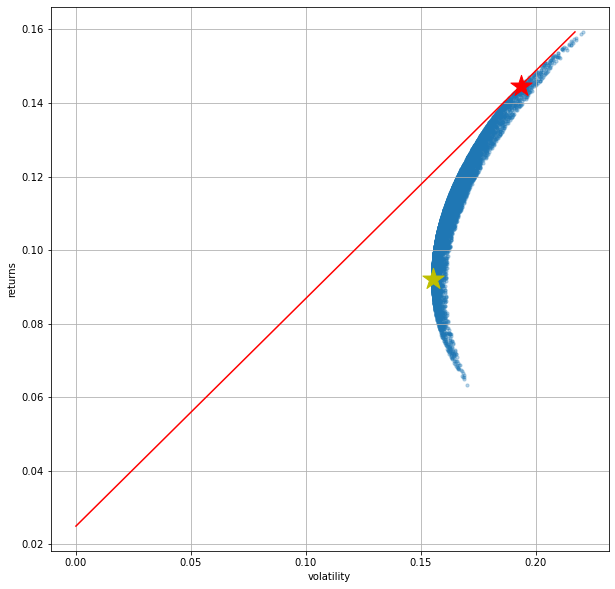

In [181]:
portfolios.plot.scatter(x='volatility',y='returns',grid=True,\
                        marker='o', s=10, alpha=0.3,figsize=[10,10])
plt.scatter(x=min_var_port[1],y=min_var_port[0],\
            color='y', marker='*', s=500)
plt.scatter(x=sharpe_max[1],y=sharpe_max[0],\
            color='r', marker='*', s=500)
plt.plot(cal_x, cal_y, color='r');

# Investor's Optimal Portfolio

In [182]:
investors_port = cal.iloc[cal['utility'].idxmax()]
investors_port

utility    0.079688
cal_y      0.134435
cal_x      0.176873
Name: 814, dtype: float64

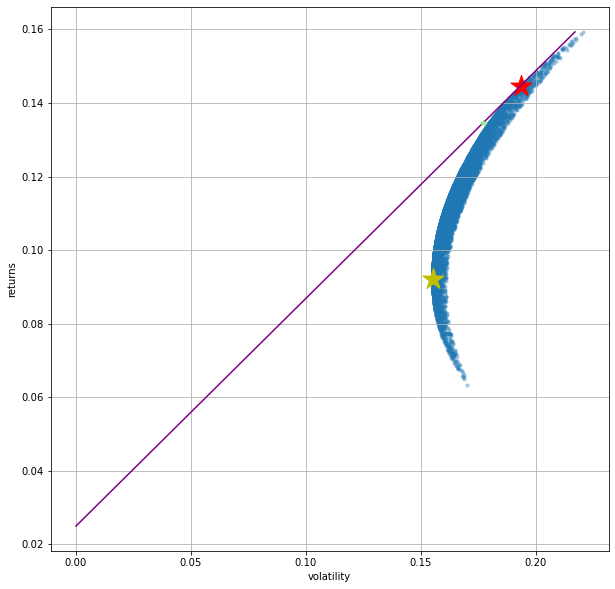

In [183]:
portfolios.plot.scatter(x='volatility',y='returns',grid=True,\
                        marker='o', s=10, alpha=0.3,figsize=[10,10])
plt.scatter(x=min_var_port[1],y=min_var_port[0],\
            color='y', marker='*', s=500)
plt.scatter(x=sharpe_max[1],y=sharpe_max[0],\
            color='r', marker='*', s=500)
plt.plot(cal_x, cal_y, color='purple')
plt.plot(investors_port[2], investors_port[1], '*', color='lightgreen');

# final portfolio mix

In [188]:
pct_risk = investors_port[2]/sharpe_max[1]

In [189]:
pct_risk

0.9141789750904838

In [197]:
risk = sharpe_max[2:]*pct_risk

In [205]:
risk_free = pd.Series([(1-pct_risk)*rf], index=['T-BILL'])

utility    0.079688
cal_y      0.134435
cal_x      0.176873
Name: 814, dtype: float64

In [218]:
investors_port.index

Index(['utility', 'cal_y', 'cal_x'], dtype='object')

In [221]:
port_mix = pd.concat([investors_port,risk,risk_free], axis=0).rename({'cal_y':'returns', 'cal_x':'volatility'})

In [222]:
port_mix

utility                                   0.079688
returns                                   0.134435
volatility                                0.176873
NASDAQOMX/NQDMXUS - Index Value_weight    0.000753
NASDAQOMX/NDX - Index Value_weight        0.619349
NASDAQOMX/QGREEN - Index Value_weight     0.294077
T-BILL                                    0.002146
dtype: float64

# Validating greatest utility, return, volatility

There is alternative to using the Capital Allocation Line. Here, the utility for each portfolio can be calculated, solving for the maximum utility. 

Then then compare the returns of the Capital Allocation Line for the same risk.

On Capital Allocation Line: 

| util  | return  | volatility  |
|---|---|---|
| 0.060 |  0.124 |  0.160 | 
| 0.058 |  0.131 |  0.171 | 
		
On Efficient Frontier:

| util  | return  | volatility  |
|---|---|---|
| -0.0172 |  0.114 |0.162|

It can be seen the CAP allocates with higher return with even lower volatility. Also the point on the Efficient Frontier does not maximise return to volatility.

In [137]:
portfolios['utility'] = portfolios['returns'] - .5*a*(portfolios['volatility']**2)

In [139]:
portfolios.loc[portfolios['utility'].idxmax()]

returns                                   0.113924
volatility                                0.161960
NASDAQOMX/NQDMXUS - Index Value_weight    0.231538
NASDAQOMX/NDX - Index Value_weight        0.270431
NASDAQOMX/QGREEN - Index Value_weight     0.498031
utility                                  -0.017231
Name: 5429, dtype: float64

In [157]:
cal

,utility,cal_y,cal_x
0,0.025000,0.025000,0.000000
1,0.031742,0.032069,0.011425
2,0.037832,0.039138,0.022850
3,0.043270,0.046206,0.034274
4,0.048054,0.053275,0.045699
5,0.052186,0.060344,0.057124
6,0.055665,0.067413,0.068549
7,0.058492,0.074481,0.079974
8,0.060666,0.081550,0.091398
9,0.062188,0.088619,0.102823
